# Explore here

In [117]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import chi2, SelectKBest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
# Importar dataset
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
# Guardar mi dataset en un csv para trabajo futuro
data.to_csv("../data/raw/data.csv", index=False)

In [120]:
# Tamaño de mis datos
data.shape

(1338, 7)

In [121]:
# Informacion general de mis datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**INFORMACIÓN GENERAL DE MIS DATOS**

Mi dataset se conforma de 1338 datos dsitribuidos en 7 columnas, no presenta valores faltantes en ninguna de ellas y observamos 4 variables numéricas y 3 categóricas (`sex`, `smoker` y `region`)

In [122]:
# Búsqueda de duplicados
display(data[data.duplicated(keep=False)])

data = data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [123]:
# Selección de atributos relevantes
data["region"].value_counts()
# Por ahora mantendré los valores de "region" hasta el análisis de correlaciones, el resto se mantiene igualmente 

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [124]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS
# ["sex", "smoker", "region"]
display(data["sex"].value_counts())
display(data["smoker"].value_counts())
display(data["region"].value_counts())

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

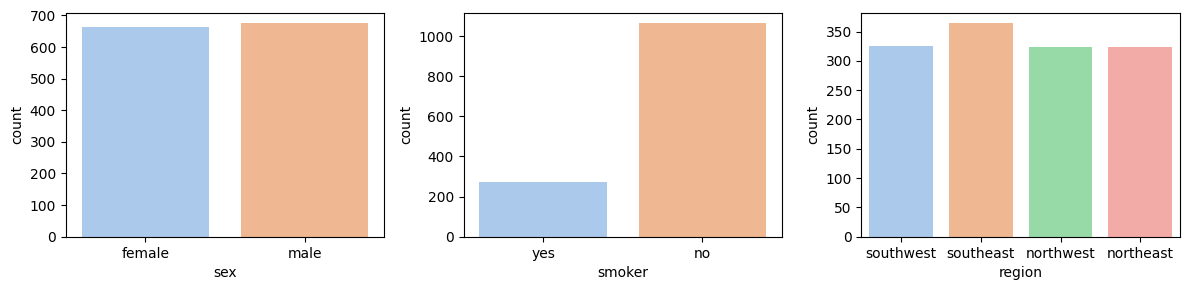

In [125]:
fig, axis = plt.subplots(1, 3, figsize = (12, 3))

sns.countplot(ax = axis[0], data = data, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[1], data = data, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[2], data = data, x = "region", palette='pastel', hue= "region", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLSIS GRÁFICO DE VARIABLES CATEGÓRICAS**

- `sex` : Variable distribuida en dos categorías: "female" y "male", prácticamente con igual cantidad de datos repartidos en ellas.
- `smoker` : Variable distribuida en dos categorías: "yes" y "no", con gran predominio de no fumadores (relación aprox. 4:1).
- `region` : Variable distribuida en 4 categorías con prácticamente igual representación entre ellas, solo predomina por muy poco "southeast".

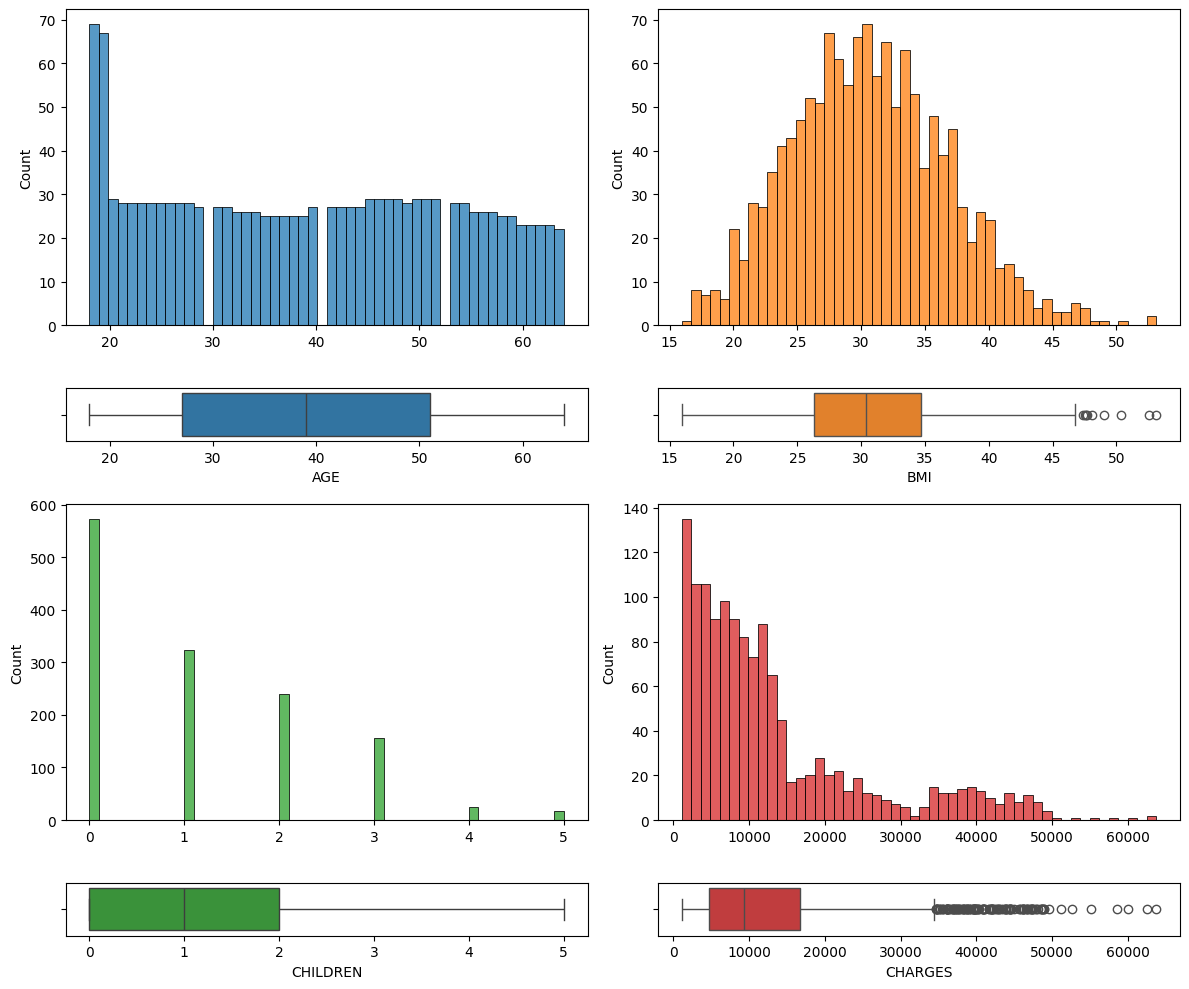

In [126]:
# ANÁLISIS DE VARIABLES NUMÉRICAS
# ["age", "bmi", "children", "charges"]
fig, axis = plt.subplots(4, 2, figsize = (12, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# age
sns.histplot(ax = axis[0, 0], data = data, x = "age", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age", color="#1f77b4").set(xlabel = "AGE")

# bmi
sns.histplot(ax = axis[0, 1], data = data, x = "bmi", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi", color="#ff7f0e").set(xlabel = "BMI")

# children
sns.histplot(ax = axis[2, 0], data = data, x = "children", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "children", color="#2ca02c").set(xlabel = "CHILDREN")

# charges
sns.histplot(ax = axis[2, 1], data = data, x = "charges", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "charges", color="#d62728").set(xlabel = "CHARGES")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLISIS GRÁFICO DE VARIABLES NUMÉRICAS**

- `age` : Mayoría de los datos distribuidos entre edades de 30 a 50 años, destacándose un pico en menores de 20 años.
- `bmi` : Distribución semejante a la normal, mayoría de los datos entre 25 y 35, alrededor de la mediana de los datos. Presencia de algunos valores atípicos en cola a la derecha que pudieran representar personas con obesidad, lo cual sería normal en la muestra.
- `children`: Variable de tipo discreta con mayor representación entre 0 y 2 niños.
- `charges`: Distribución asimétrica con cola a la derecha y concentración de datos entre 0 y 20000, presencia de outliers que representarían primas de seguro muy altas, ya sea debido a errores de datos o condiciones de personas que eleven mucho el valor.

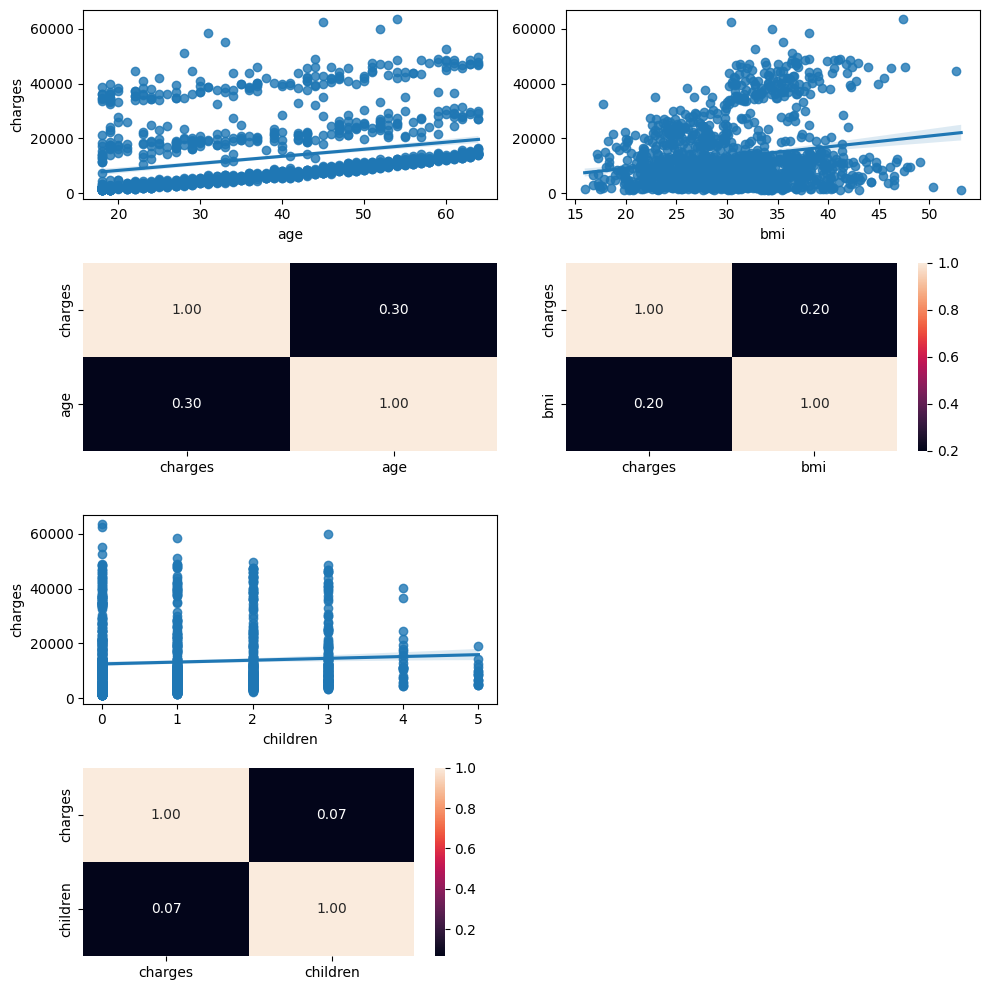

In [127]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "charges"
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "age", y = "charges")
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "children", y = "charges")
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**RESUMEN DE ANÁLISIS NUMÉRICO - NUMÉRICO**

Correlación leve entre las variables `age` y `bmi` con la variable target `charges`, indicando que al aumentar tanto la edad como el ñindice de masa corporal aumenta levemente con relación a ellos el precio de prima del seguro. La presencia de 1 o más hijos no parece modificar dicho precio.

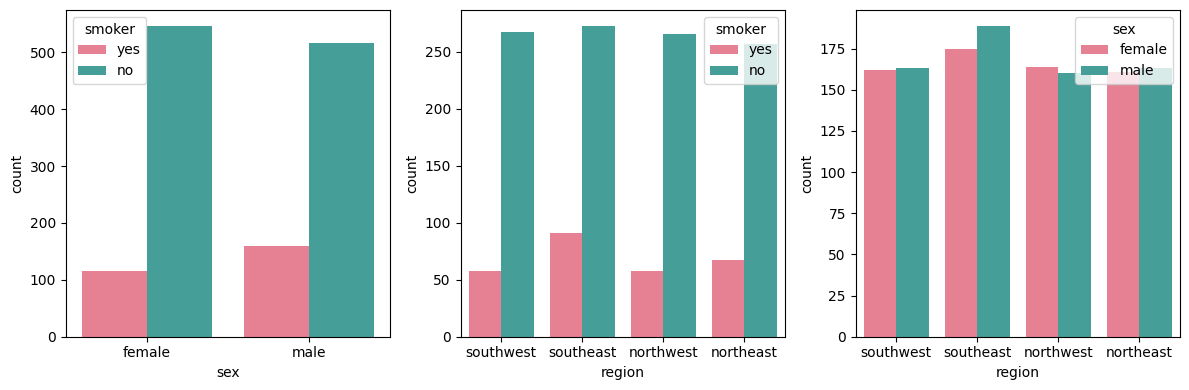

In [128]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
# ["sex", "smoker", "region"]
fig, axis = plt.subplots(1, 3, figsize = (12, 4))

sns.countplot(ax = axis[0], data = data, x = "sex", palette='husl', hue= "smoker", legend=True)
sns.countplot(ax = axis[1], data = data, x = "region", palette='husl', hue= "smoker", legend=True)
sns.countplot(ax = axis[2], data = data, x = "region", palette='husl', hue= "sex", legend=True)



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Bastante similar la distribucion de fumadores por sexo, fumadores por región y sexo por región que en la distribucion total.

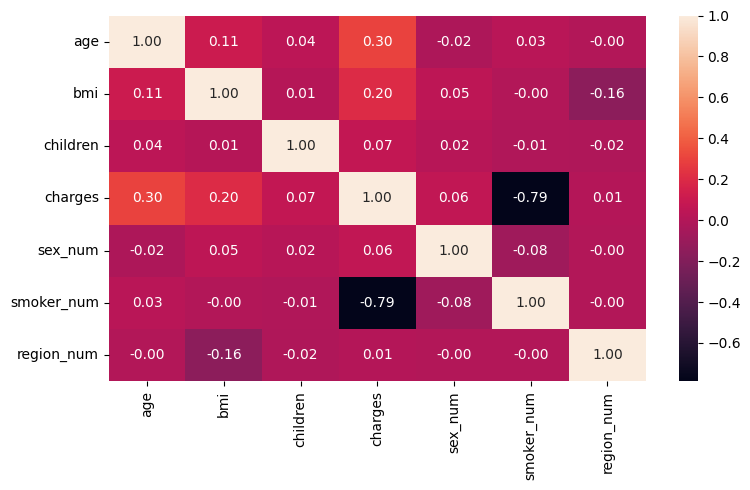

In [129]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO
# Variables numéricas
# ["age", "bmi", "children", "charges"]
# Codificando las variables categóricas a números enteros para su procesamiento
# ["sex", "smoker", "region"]
data["sex_num"] = pd.factorize(data["sex"])[0]
data["smoker_num"] = pd.factorize(data["smoker"])[0]
data["region_num"] = pd.factorize(data["region"])[0]

fig, axis = plt.subplots(figsize = (8, 5))

sns.heatmap(data[["age", "bmi", "children", "charges", "sex_num", "smoker_num", "region_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**CONCLUSIONES**

Del análisis de correlaciones entre todas las variables podemos identificar una fuerte relación entre `smoker` y la variable target `charges`, lo cual parece obedecer a la lógica de que personas fumadoras tendrán una prima de seguro médico más alta por esta condición. Se vuelve a evidenciar correlación leve entre `bmi` y `age` con `charges` y que la variable `region` no está prácticamente correlacionada con ninguna otra variable, siendo probable que se elimine del análisis y del posterior modelo.

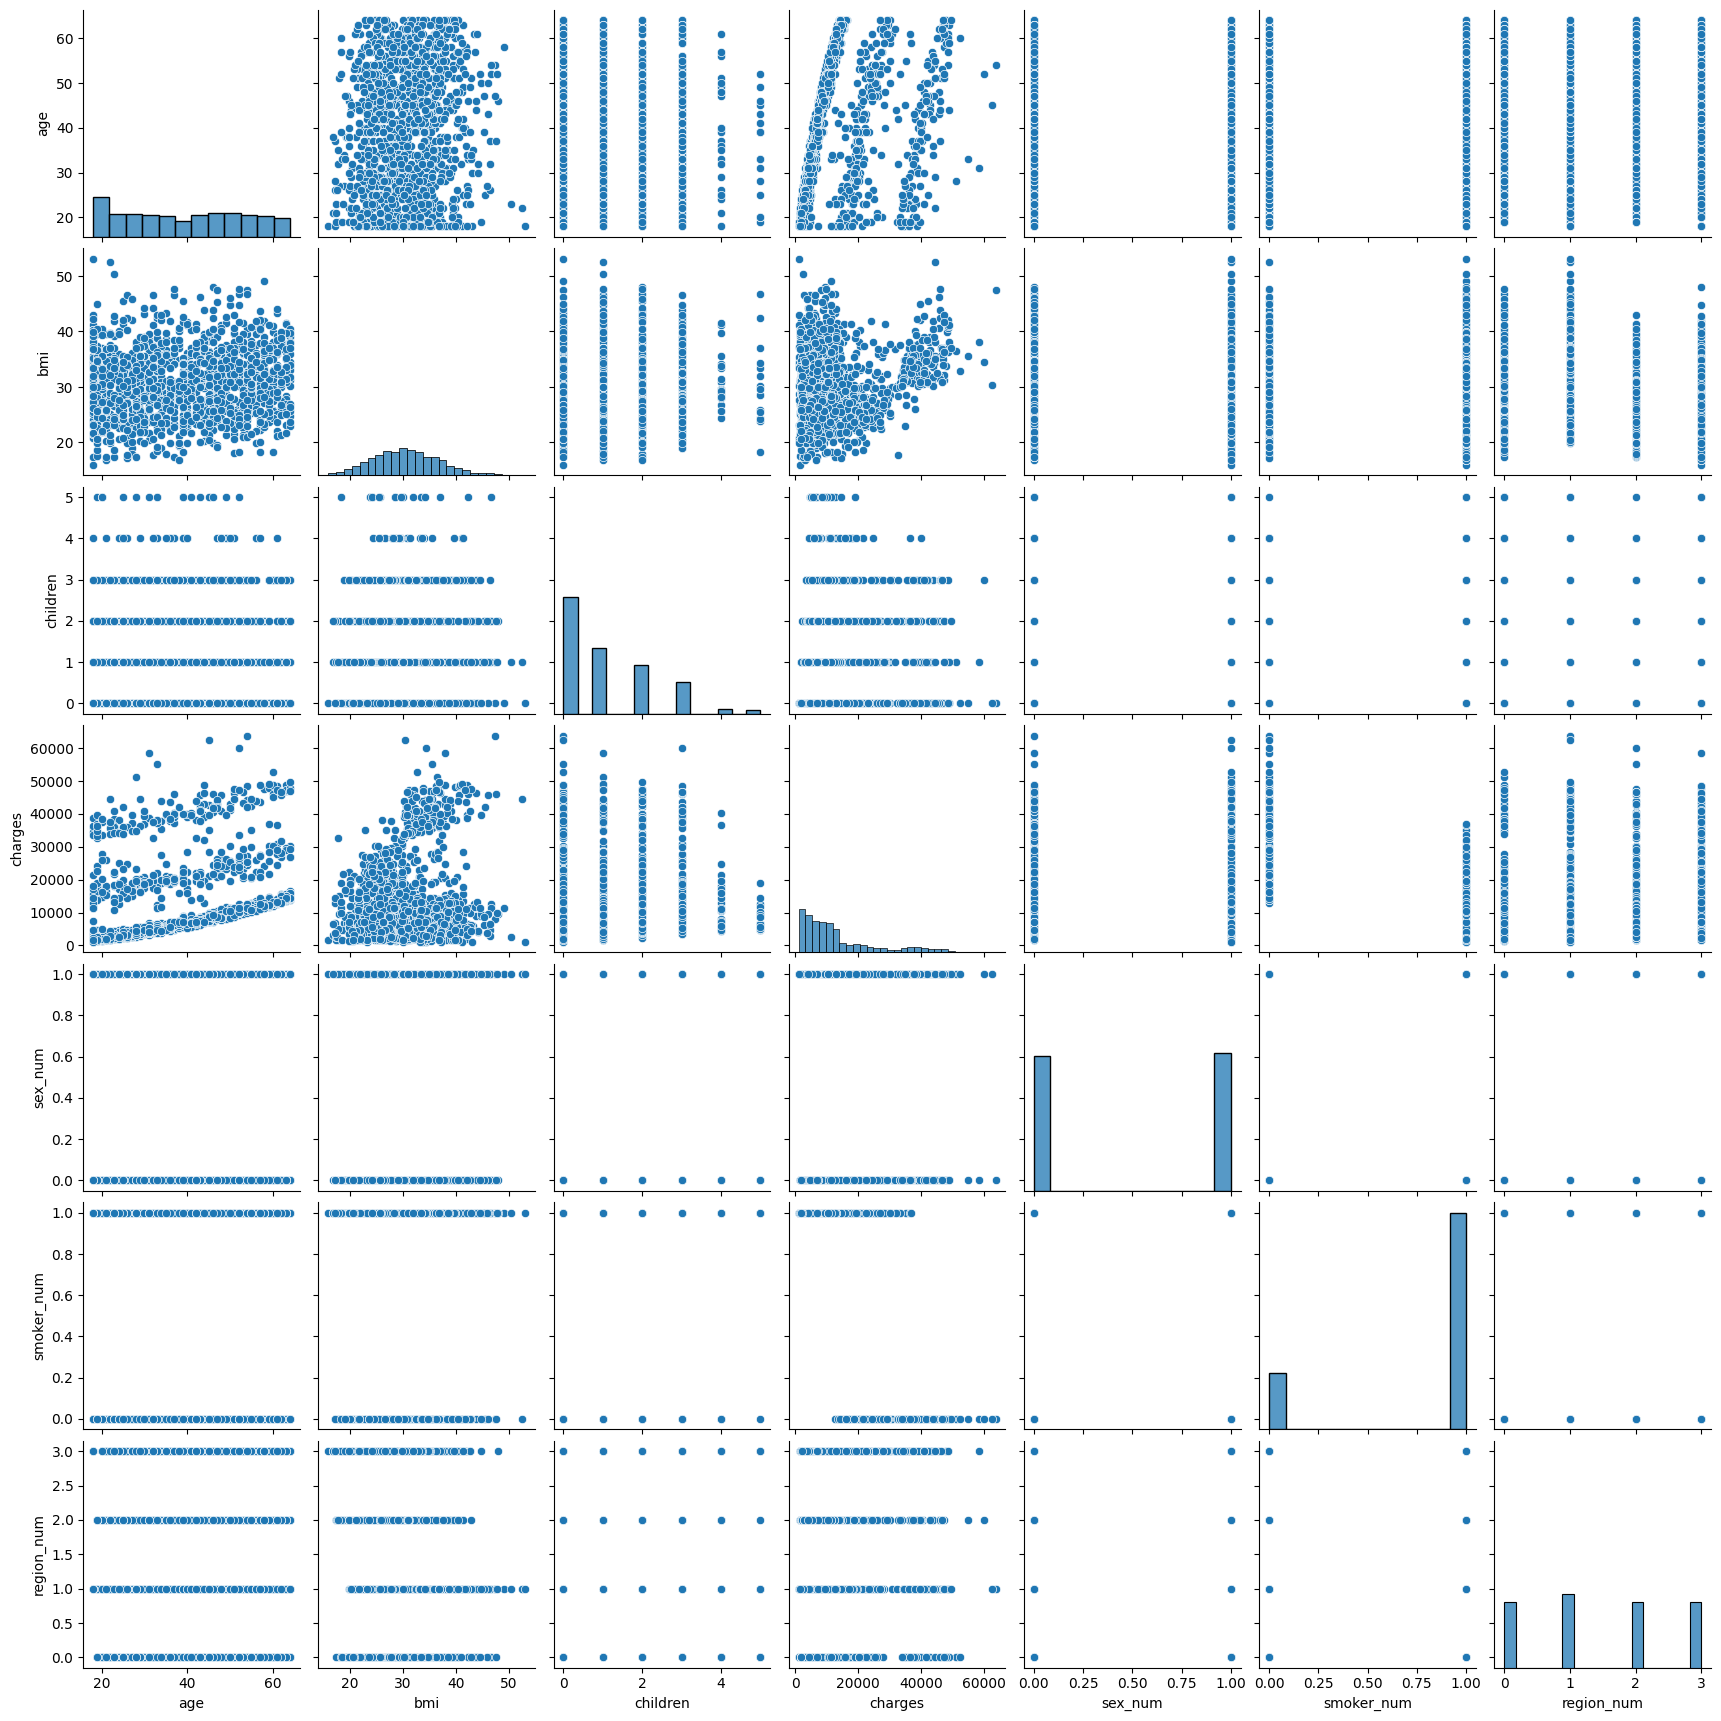

In [130]:
# RELACIONES TODOS CON TODOS
sns.pairplot(data = data)
plt.show()

In [131]:
# LIMPIEZA DE VALORES ATÍPICOS
# Las variables que presentan valores atípicos son "charges" y "bmi"
display(data[data["charges"] > 50000])
# Los datos de "charges" atípicos corresponden todos a personas con alto índice de masa corporal y fumadores
# Aunque sean valores altos pueden deberse a la condición de esas personas y constituir valores válidos
display(data[data["bmi"] > 50])
data = data[data["bmi"] <= 50]
# Los datos de "bmi" atípicos pueden representar personas dentro de la muestra con elevado índice de masa corporal, y pueden ser datos válidos, solo eliminaré los datos
# correspondientes a personas con un bmi mayor a 50, lo cual representaría obesidad extrema y no es representativo en la muestra

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
34,28,male,36.400,1,yes,southwest,51194.55914,1,0,0
543,54,female,47.410,0,yes,southeast,63770.42801,0,0,1
577,31,female,38.095,1,yes,northeast,58571.07448,0,0,3
819,33,female,35.530,0,yes,northwest,55135.40209,0,0,2
1146,60,male,32.800,0,yes,southwest,52590.82939,1,0,0
1230,52,male,34.485,3,yes,northwest,60021.39897,1,0,2
1300,45,male,30.360,0,yes,southeast,62592.87309,1,0,1


,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,region_num
847,23,male,50.38,1,no,southeast,2438.0552,1,1,1
1047,22,male,52.58,1,yes,southeast,44501.3982,1,0,1
1317,18,male,53.13,0,no,southeast,1163.4627,1,1,1


In [132]:
# TRATAMIENTO DE VALORES FALTANTES
data.isnull().sum().sort_values(ascending=False)
# El dataset en este punto no presenta valores faltantes, como ya habíamos visto al inicio del análisis

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
sex_num       0
smoker_num    0
region_num    0
dtype: int64

In [ ]:
# CODIFICACIÓN Y ESCALAMIENTO
# Como analizábamos antes, la variable "region" no aporta mucho al análisis, por tanto la eliminamos y no centramos esfuerzos en codificarla
# Más adelante, si el modelo no diera los resultados esperados se puede considerar incluirla
# La factorización hecha antes de las columnas "sex" y "smoker" me vale para el modelo
# sex = {"female" : 0, "male": 1}, smoker = {"yes" : 0, "no": 1}
data_coded = data.drop(["region", "sex", "smoker", "region_num"], axis=1)



# Separación de train y test
X = data_coded.drop("charges", axis = 1)
y = data_coded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# # Guardar mi informacion en dos archivos csv para el trabajo desde app.py
# # Unir X_train con y_train
# train_data = pd.concat([X_train, y_train], axis=1)

# # Unir X_test con y_test
# test_data = pd.concat([X_test, y_test], axis=1)

# # Guardar en archivos CSV
# train_data.to_csv('../data/processed/train_data.csv', index=False)
# test_data.to_csv('../data/processed/test_data.csv', index=False)

# Escalado
# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# Aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,age,bmi,children,sex_num,smoker_num
1284,1.542771,0.968416,-0.070201,0.962285,-2.014168
1114,-1.165159,-0.995541,-0.902471,0.962285,0.496483
968,-1.307682,-0.789817,0.762069,0.962285,0.496483
599,0.901419,1.172474,0.762069,-1.039193,0.496483
170,1.685293,1.829625,-0.902471,0.962285,0.496483


In [134]:
# Selección de parámetros
# Conservamos por ahora los 5 parámetros

# Genera el modelo
model = LinearRegression()

# Entrena
model.fit(X_train_scal, y_train)

LinearRegression()

In [135]:
# Prediccion
y_pred = model.predict(X_test_scal)
y_pred

array([ 7687.43150159,  7511.996287  , 10874.42272527, 31583.11554951,
        9122.3271049 , 13329.96971072, 29974.69478473,  1713.90343501,
       10942.25755161, 36339.98040166, 10429.44654045, 33101.69078277,
        5493.9705784 , 17478.50562175, 10221.62365351,  9624.06533738,
        4212.70054181, 32047.53727659,  6255.39424979,  5597.56035188,
        3893.16073156,  8389.61284049, 15115.5626012 , 30670.91293587,
       32186.96319962,  5364.60688346, 12098.09330563,  3295.33721496,
       10939.71110443, 13529.98797379,  6034.59382045,  6885.23633717,
        1838.92515236, 12223.64542393, 39963.23428317,  5905.70774766,
        4862.55833034,  3909.08346733,  7940.06441163,  9353.33068946,
        6484.55647105, 29835.44058165, 35054.86104968,  5187.61176712,
        7375.48591272,  3668.23240281,  4520.66559602, 13482.9531157 ,
        4224.17206669,  9251.23631188,  6912.36748934, 11421.96727692,
        2272.05818325,  3799.83431629, 11062.22664084,  9987.55782538,
      

In [136]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

Intercepto (b0): 12974.09333380506
Coeficientes (b1): [ 3491.37990158  1847.08945406   618.07131736   -97.35924584
 -9231.5210153 ]


In [137]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 32919349.719995562
Coeficiente de determinación: 0.813914533282725


In [138]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(5737.53864649255)